Set up the environment

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

work_dir = '/content/drive/MyDrive/ML_Iocchi_Assignments/Assignment_1'
dataset_dir = os.path.join(work_dir, 'Dataset')

Mounted at /content/drive


Read dataset

In [2]:
dataset_path = os.path.join(dataset_dir, '0_combined_r5_data.csv')

try:
    dataset = pd.read_csv(dataset_path, delimiter=';')
    dataset.columns = dataset.columns.str.strip()
    print(dataset.head())
except FileNotFoundError:
    print(f"Error: File not found at {dataset_path}")
except pd.errors.EmptyDataError:
    print(f"Error: The file at {dataset_path} is empty.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

      j0     j1     j2     j3     j4  cos(j0)  cos(j1)  cos(j2)  cos(j3)  \
0  0.000  0.000  0.000  0.000  0.000    1.000    1.000    1.000    1.000   
1 -0.011 -0.023 -0.032  0.013 -0.003    1.000    1.000    0.999    1.000   
2  0.007 -0.041 -0.069  0.001 -0.005    1.000    0.999    0.998    1.000   
3  0.072 -0.067 -0.080 -0.058 -0.025    0.997    0.998    0.997    0.998   
4  0.167 -0.133 -0.124 -0.140 -0.034    0.986    0.991    0.992    0.990   

   cos(j4)  ...  sin(j2)  sin(j3)  sin(j4)   ee_x   ee_y   ee_z  ee_qw  ee_qx  \
0    1.000  ...    0.000    0.000    0.000  0.000  0.000  0.590  1.000  0.000   
1    1.000  ...   -0.032    0.013   -0.003 -0.019  0.001  0.590  1.000 -0.002   
2    1.000  ...   -0.069    0.001   -0.005 -0.042  0.000  0.588  0.999 -0.002   
3    1.000  ...   -0.080   -0.058   -0.025 -0.072 -0.002  0.584  0.994 -0.009   
4    0.999  ...   -0.124   -0.140   -0.034 -0.132 -0.018  0.567  0.977 -0.000   

   ee_qy  ee_qz  
0  0.000  0.000  
1 -0.021 -0.005  
2 

# Feedforward NN

## Features and target selection

In [3]:
# Prepare the data
X = dataset[['j0', 'j1','j2','j3','j4', 'cos(j0)', 'cos(j1)', 'cos(j2)', 'cos(j3)', 'cos(j4)','sin(j0)','sin(j1)','sin(j2)','sin(j3)','sin(j4)']]
y = dataset[['ee_x', 'ee_y', 'ee_qw', 'ee_qz']]

## Data normalization and data splitting

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# data normalization
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_normalized = scaler_X.fit_transform(X)
y_normalized = scaler_y.fit_transform(y)

# training and test set division
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.3, random_state=77)
# 0.3 --> 30% of the data for test testing
# 77 --> seed for the randomness


## Models

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.layers import Input

In [ ]:
# Models definition
model1 = Sequential([
    Dense(32, activation='relu', input_shape=(15,)),
    Dense(16, activation='relu'),
    Dense(4, activation='linear')
])

model2 = Sequential([
    Dense(64, activation='relu', input_shape=(15,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(4, activation='linear')
])

model3 = Sequential([
    Dense(128, activation='relu', input_shape=(15,)), # Input layer with 6 features
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(4, activation='linear')
])


learning_rate_1 = 0.001
learning_rate_2 = 0.001
learning_rate_3 = 0.001

# Models compiling
model1.compile(optimizer=Adam(learning_rate=learning_rate_1), loss='mse', metrics=['mae'])
model2.compile(optimizer=Adam(learning_rate=learning_rate_2), loss='mse', metrics=['mae'])
model3.compile(optimizer=Adam(learning_rate=learning_rate_3), loss='mse', metrics=['mae'])

## Training

### Model 1 - 32, 16, 4

In [ ]:
# training of the model
history1 = model1.fit(X_train, y_train,
                    epochs=10,                # epoch number (number of iteration over the entire dataset)
                    # more can lead to better lerning
                    # too many can cause overfitting
                    batch_size=32,             # batch dimension
                    validation_split=0.2,      # validation set percentage
                    verbose=1)                 # shows the process of training

Epoch 1/10
19250/19250 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - loss: 0.0094 - mae: 0.0585 - val_loss: 7.5229e-04 - val_mae: 0.0215
Epoch 2/10
19250/19250 ━━━━━━━━━━━━━━━━━━━━ 79s 2ms/step - loss: 6.5096e-04 - mae: 0.0199 - val_loss: 5.0576e-04 - val_mae: 0.0176
Epoch 3/10
19250/19250 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - loss: 4.9527e-04 - mae: 0.0174 - val_loss: 4.2457e-04 - val_mae: 0.0161
Epoch 4/10
19250/19250 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - loss: 4.2952e-04 - mae: 0.0162 - val_loss: 3.9380e-04 - val_mae: 0.0155
Epoch 5/10
19250/19250 ━━━━━━━━━━━━━━━━━━━━ 72s 2ms/step - loss: 3.8193e-04 - mae: 0.0153 - val_loss: 3.5205e-04 - val_mae: 0.0146
Epoch 6/10
19250/19250 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - loss: 3.4495e-04 - mae: 0.0145 - val_loss: 3.1537e-04 - val_mae: 0.0139
Epoch 7/10
19250/19250 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - loss: 3.2421e-04 - mae: 0.0141 - val_loss: 3.1208e-04 - val_mae: 0.0139
Epoch 8/10
19250/19250 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - loss: 3.1127e-04 - mae: 0.01

### Model 2 - 64, 32, 16, 4

In [ ]:
# training of the model
history2 = model2.fit(X_train, y_train,
                    epochs=10,                # epoch number (number of iteration over the entire dataset)
                    # more can lead to better lerning
                    # too many can cause overfitting
                    batch_size=32,             # batch dimension
                    validation_split=0.2,      # validation set percentage
                    verbose=1)                 # shows the process of training

Epoch 1/10
19250/19250 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - loss: 0.0058 - mae: 0.0389 - val_loss: 3.1885e-04 - val_mae: 0.0141
Epoch 2/10
19250/19250 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 2.4439e-04 - mae: 0.0123 - val_loss: 1.9699e-04 - val_mae: 0.0112
Epoch 3/10
19250/19250 ━━━━━━━━━━━━━━━━━━━━ 77s 2ms/step - loss: 1.7397e-04 - mae: 0.0104 - val_loss: 1.4561e-04 - val_mae: 0.0093
Epoch 4/10
19250/19250 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 1.4033e-04 - mae: 0.0093 - val_loss: 1.1177e-04 - val_mae: 0.0083
Epoch 5/10
19250/19250 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - loss: 1.2136e-04 - mae: 0.0086 - val_loss: 1.1010e-04 - val_mae: 0.0083
Epoch 6/10
19250/19250 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 1.0780e-04 - mae: 0.0081 - val_loss: 1.2367e-04 - val_mae: 0.0085
Epoch 7/10
19250/19250 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - loss: 9.9304e-05 - mae: 0.0078 - val_loss: 9.0874e-05 - val_mae: 0.0075
Epoch 8/10
19250/19250 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - loss: 9.2803e-05 - mae: 0.00

### Model 3 - 128, 64, 32, 16, 4

In [ ]:
# training of the model
history3 = model3.fit(X_train, y_train,
                    epochs=10,                # epoch number (number of iteration over the entire dataset)
                    # more can lead to better lerning
                    # too many can cause overfitting
                    batch_size=32,             # batch dimension
                    validation_split=0.2,      # validation set percentage
                    verbose=1)                 # shows the process of training

Epoch 1/10
19250/19250 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - loss: 0.0066 - mae: 0.0328 - val_loss: 1.4345e-04 - val_mae: 0.0095
Epoch 2/10
19250/19250 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - loss: 1.2567e-04 - mae: 0.0089 - val_loss: 8.1277e-05 - val_mae: 0.0072
Epoch 3/10
19250/19250 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - loss: 8.5889e-05 - mae: 0.0073 - val_loss: 1.0387e-04 - val_mae: 0.0080
Epoch 4/10
19250/19250 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - loss: 6.8423e-05 - mae: 0.0065 - val_loss: 5.4581e-05 - val_mae: 0.0058
Epoch 5/10
19250/19250 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - loss: 5.7686e-05 - mae: 0.0060 - val_loss: 3.5587e-05 - val_mae: 0.0047
Epoch 6/10
19250/19250 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - loss: 5.1035e-05 - mae: 0.0056 - val_loss: 6.1203e-05 - val_mae: 0.0062
Epoch 7/10
19250/19250 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 4.5111e-05 - mae: 0.0053 - val_loss: 3.9714e-05 - val_mae: 0.0050
Epoch 8/10
19250/19250 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - loss: 4.1976e-05 - mae: 0.00

## Evaluation

##### Utils

In [ ]:
def angular_error(w_true, z_true, w_pred, z_pred):
    # Ricostruisci i componenti x e y, assumendo che x = 0, y = 0
    # (questa è un'approssimazione; la ricostruzione completa richiede x e y)
    x_true, y_true = 0, 0
    x_pred, y_pred = 0, 0

    # Normalizzazione dei quaternioni per evitare problemi di numeri fuori scala
    norm_true = np.sqrt(w_true**2 + x_true**2 + y_true**2 + z_true**2)
    norm_pred = np.sqrt(w_pred**2 + x_pred**2 + y_pred**2 + z_pred**2)

    w_true /= norm_true
    z_true /= norm_true
    w_pred /= norm_pred
    z_pred /= norm_pred

    # Prodotto scalare tra i due quaternioni
    dot_product = w_true * w_pred + x_true * x_pred + y_true * y_pred + z_true * z_pred

    # Calcolare l'errore angolare
    angle = 2 * np.arccos(np.clip(dot_product, -1.0, 1.0))  # Clamp per evitare numeri fuori dal dominio di arccos
    return np.degrees(np.mean(angle))

In [ ]:
def MSE_MAE_Errors(model, X_test, y_test):
  # Predictions on the test set
  y_pred = model.predict(X_test)
  y_true = y_test

  # MSE and MAE
  mse = np.mean((y_pred - y_true) ** 2, axis=0)
  mae = np.mean(np.abs(y_pred - y_true), axis=0)

  print(f"MSE (x, y, w, z): {mse}")
  print(f"MAE (x, y, w, z): {mae}")

  # Euclidean distance error for (x,y) coordinates
  euclidean_error = np.sqrt(np.sum((y_pred[:, :2] - y_true[:, :2]) ** 2, axis=1))
  print(f"Mean Euclidean Error: {np.mean(euclidean_error):.4f}")

  # Angular error for (w,z) quaternions
  print(f"Mean Angular Error (qw, qz): {angular_error(y_pred[:, 2], y_pred[:, 3], y_true[:, 2], y_true[:, 3]):.6f}")

  # (2x2 layout, 3 plot) -------------------------------------------------------
  fig, axs = plt.subplots(2, 2, figsize=(10, 10))

  # Labels for the columns (x, y)
  labels = ['x', 'y','w','z']

  # Plot (x, y)
  for i in range(2):  # for x and y
      axs[0, i].scatter(y_true[:, i], y_pred[:, i], alpha=0.6)
      axs[0, i].plot([y_true[:, i].min(), y_true[:, i].max()],
                      [y_true[:, i].min(), y_true[:, i].max()], 'k--', lw=1)
      axs[0, i].set_xlabel(f"True {labels[i]}")
      axs[0, i].set_ylabel(f"Predicted {labels[i]}")
      axs[0, i].set_title(f"True {labels[i]} vs Predicted {labels[i]}")

  # Plot (w, z)
  for i in range(2, 4):  # for w and z
      axs[1, i-2].scatter(y_true[:, i], y_pred[:, i], alpha=0.6)
      axs[1, i-2].plot([y_true[:, i].min(), y_true[:, i].max()],
                        [y_true[:, i].min(), y_true[:, i].max()], 'k--', lw=1)
      axs[1, i-2].set_xlabel(f"True {labels[i]}")
      axs[1, i-2].set_ylabel(f"Predicted {labels[i]}")
      axs[1, i-2].set_title(f"True {labels[i]} vs Predicted {labels[i]}")

  # Histogram of errors
  #errors = y_pred - y_true
  #axs[2].hist(errors.flatten(), bins=50, color='blue', alpha=0.7)
  #axs[2].set_title("Error Distribution")
  #axs[2].set_xlabel("Error")
  #axs[2].set_ylabel("Frequency")

  # Spazio tra i plot
  plt.tight_layout()

  # Mostra tutti i plot
  plt.show()

### Model 1 - 32, 16, 4

10313/10313 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step
MSE (x, y, w, z): [0.00029282 0.00043075 0.04524849 0.01716965]
MAE (x, y, w, z): [0.01347436 0.01669511 0.15035603 0.08391704]
Mean Euclidean Error: 0.0237
Mean Angular Error (qw, qz): 1.992425


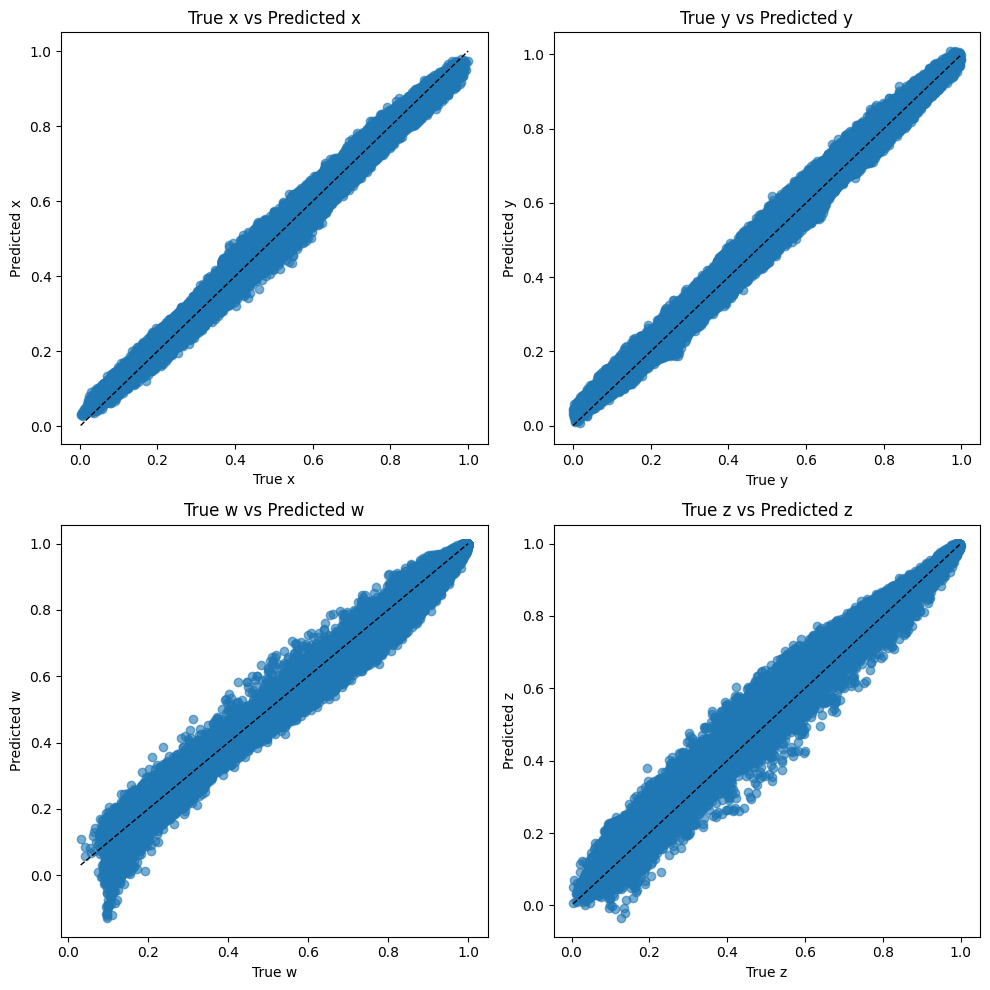

In [ ]:
MSE_MAE_Errors(model1, X_test, y_test)

### Model 2 - 64, 32, 16, 4

10313/10313 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step
MSE (x, y, w, z): [7.91954891e-05 1.02309204e-04 4.39072406e-02 1.78959305e-02]
MAE (x, y, w, z): [0.00706984 0.00807612 0.14752543 0.08629945]
Mean Euclidean Error: 0.0119
Mean Angular Error (qw, qz): 0.849078


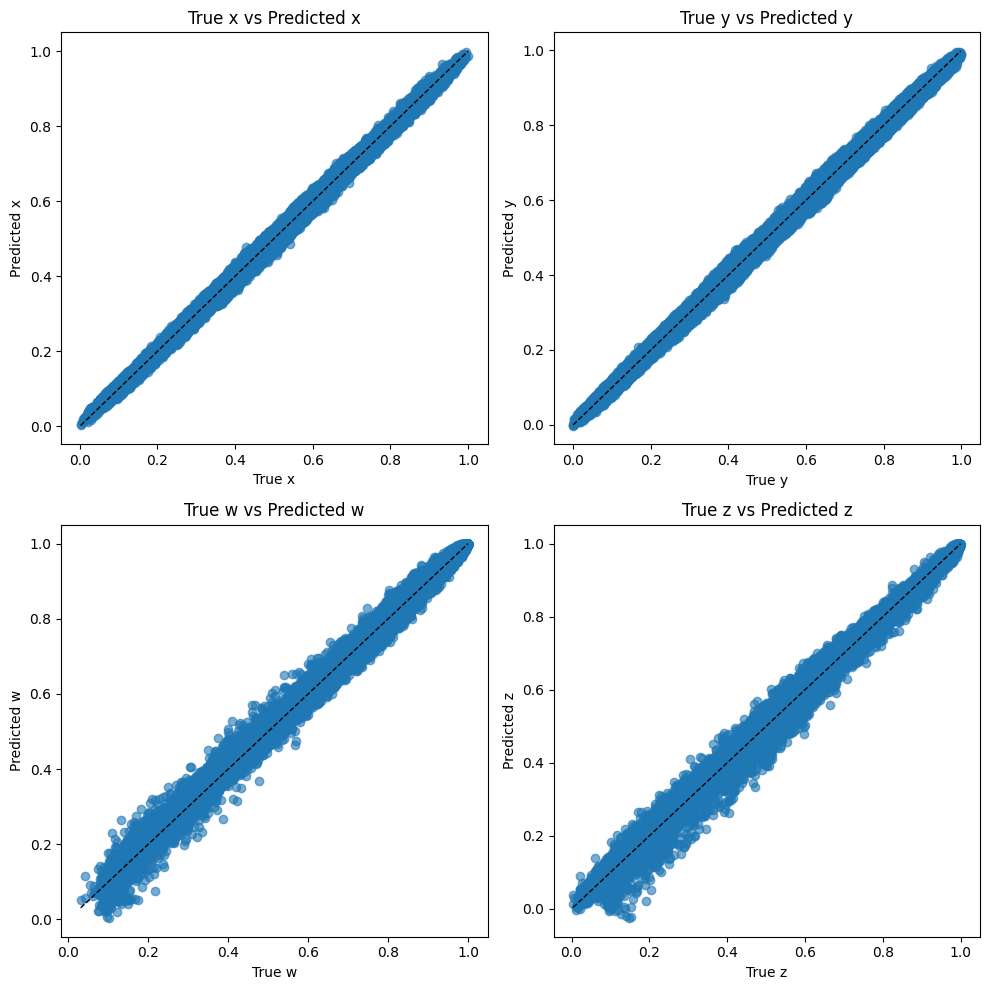

In [ ]:
MSE_MAE_Errors(model2, X_test, y_test)

### Model 3 - 128, 64, 32, 16, 4

10313/10313 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step
MSE (x, y, w, z): [5.04603384e-05 4.64981485e-05 4.45449022e-02 1.78516821e-02]
MAE (x, y, w, z): [0.00581828 0.00557029 0.14828673 0.08612341]
Mean Euclidean Error: 0.0088
Mean Angular Error (qw, qz): 0.588519


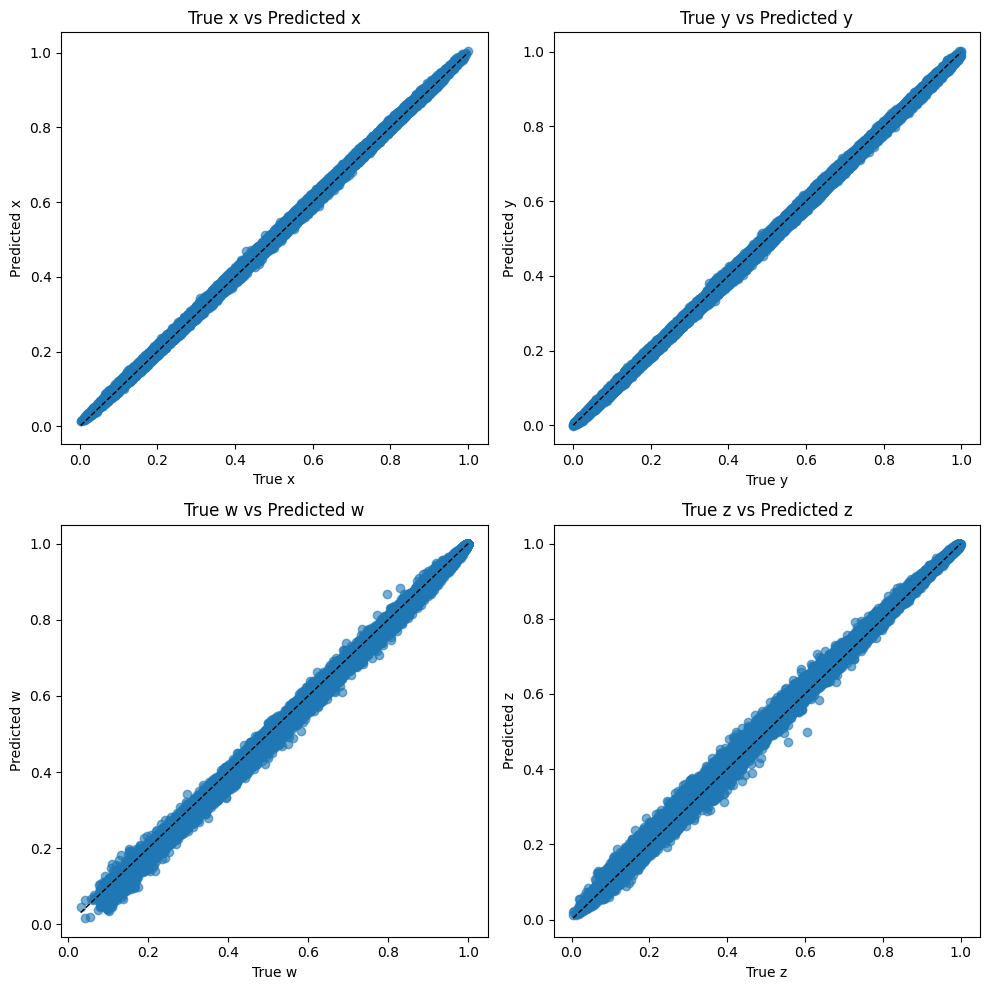

In [ ]:
MSE_MAE_Errors(model3, X_test, y_test)

# Grid Search

In [ ]:
!pip install optuna --user

In [ ]:
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow.keras.layers import Input

def objective(trial):
    # Definizione degli iperparametri da ottimizzare
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    epochs = trial.suggest_int('epochs', 10, 20)

    # Costruzione del modello
    model = Sequential()
    model.add(Input(shape=(15,)))  # Definizione esplicita del layer di input

    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))

    model.add(Dense(4, activation='linear'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')

    # Addestramento
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.2, verbose=0)
    val_loss = history.history['val_loss'][-1]
    return val_loss

# Esecuzione della ricerca
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

print(f"Best hyperparameters: {study.best_params}")

[I 2024-11-29 21:10:48,260] A new study created in memory with name: no-name-61a4a1e2-cd5d-4c35-b560-355239b556cb
<ipython-input-6-bdc95d259855>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
[I 2024-11-29 21:22:10,585] Trial 0 finished with value: 2.2979636923992075e-05 and parameters: {'learning_rate': 0.0005674052904746402, 'epochs': 11}. Best is trial 0 with value: 2.2979636923992075e-05.
[I 2024-11-29 21:36:40,234] Trial 1 finished with value: 6.263135583139956e-05 and parameters: {'learning_rate': 0.003136398715529632, 'epochs': 12}. Best is trial 0 with value: 2.2979636923992075e-05.
[I 2024-11-29 22:00:12,024] Trial 2 finished with value: 0.00015243272355291992 and parameters: {'learning_rate': 0.007579595531382226, 'epochs': 19}. Best is trial 0 wi

Best hyperparameters: {'learning_rate': 0.0005508643295928648, 'epochs': 16}


# Jacobian evaluation

In [13]:
best_model = Sequential()
best_model.add(Input(shape=(15,)))  # Definizione esplicita del layer di input

best_model.add(Dense(256, activation='relu'))
best_model.add(Dense(128, activation='relu'))
best_model.add(Dense(64, activation='relu'))
best_model.add(Dense(32, activation='relu'))
best_model.add(Dense(16, activation='relu'))

best_model.add(Dense(4, activation='linear'))
best_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss='mse')

# Addestramento
history = best_model.fit(X_train, y_train, epochs=16, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/16
19250/19250 ━━━━━━━━━━━━━━━━━━━━ 86s 4ms/step - loss: 0.0023 - val_loss: 2.7330e-04
Epoch 2/16


KeyboardInterrupt: 

In [ ]:
import numpy as np

# Example usage for a 2-DOF robot (adjust for your actual robot)
# Assuming your input features include joint angles j0 and j1

def analytical_jacobian(joint_angles):
  """Computes the analytical Jacobian for a 2-DOF robot."""
  j0, j1, j2, j3, j4 = joint_angles[0], joint_angles[1]
  # Replace with your robot's kinematics.  This is a placeholder.
  l1 = 1.0  # Link length 1
  l2 = 1.0  # Link length 2
  jacobian = np.array([
      [-l1 * np.sin(j0) - l2 * np.sin(j0 + j1), -l2 * np.sin(j0 + j1)],
      [l1 * np.cos(j0) + l2 * np.cos(j0 + j1), l2 * np.cos(j0 + j1)]
  ])
  return jacobian

def learned_jacobian(model, input_data):
  """Approximates the Jacobian of the learned model using finite differences."""
  jacobian_approx = []
  epsilon = 1e-4  # Small perturbation

  for i in range(len(input_data)):
      jacobian_row = []
      for j in range(len(input_data[i])):
          original_value = input_data[i][j]

          input_perturbed_plus = input_data[i].copy()
          input_perturbed_plus[j] += epsilon
          output_plus = model.predict(np.array([input_perturbed_plus]))

          input_perturbed_minus = input_data[i].copy()
          input_perturbed_minus[j] -= epsilon
          output_minus = model.predict(np.array([input_perturbed_minus]))

          jacobian_row.append(np.array((output_plus - output_minus) / (2*epsilon)).flatten())
      jacobian_approx.append(jacobian_row)

  return np.array(jacobian_approx).reshape(input_data.shape[0],-1)

# Example usage (assuming model1 is your trained model and X_test is your data)
num_samples = 10  # Number of samples to compare

for i in range(num_samples):
  # Example joint angles from the first two features (adjust indexing if needed)
  joint_angles_sample = X_test[i,:2]
  analytical_j = analytical_jacobian(joint_angles_sample)
  learned_j_approx = learned_jacobian(model1, np.array([X_test[i]]))[0].reshape(4,15)
  print(f"Sample {i+1}:")
  print("Analytical Jacobian:\n", analytical_j)
  print("Learned Jacobian Approximation:\n", learned_j_approx)

  # Compare the Jacobians (example: mean squared error)
  mse = np.mean((analytical_j - learned_j_approx[:2,:2]) ** 2) #Adjust slicing as per the robot model
  print(f"Mean Squared Error between Jacobians: {mse}")

  print("-" * 20)

# Custom loss function

In [ ]:
import tensorflow as tf
import math

def orientation_loss(y_true, y_pred):
  """
  Calculates the angular error between predicted and true quaternions.

  Args:
    y_true: True quaternion values (shape: [batch_size, 4]).
    y_pred: Predicted quaternion values (shape: [batch_size, 4]).

  Returns:
    The mean angular error in degrees.
  """
  # Extract the relevant quaternion components (w, z)
  w_true, z_true = y_true[:, 2], y_true[:, 3]
  w_pred, z_pred = y_pred[:, 2], y_pred[:, 3]

  # Normalize quaternions
  norm_true = tf.sqrt(w_true**2 + z_true**2)
  norm_pred = tf.sqrt(w_pred**2 + z_pred**2)

  w_true = w_true / norm_true
  z_true = z_true / norm_true
  w_pred = w_pred / norm_pred
  z_pred = z_pred / norm_pred

  # Calculate dot product
  dot_product = w_true * w_pred + z_true * z_pred

  tf.print(dot_product)
  # Calculate angular error in degrees
  angle_error = 2 * tf.math.acos(tf.clip_by_value(dot_product, -1.0, 1.0))  # Clip to avoid NaN
  angle_error_degrees = angle_error * (180.0 / math.pi)  # Convert radians to degrees

  # Return the mean angular error
  return tf.reduce_mean(angle_error_degrees)

In [ ]:
# Models definition
custom_model = Sequential([
    Dense(32, activation='tanh', input_shape=(15,)),
    Dense(16, activation='tanh'),
    Dense(4, activation='linear')
])

custom_model.compile(optimizer='Adam', loss=orientation_loss, metrics=['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
custom_history = custom_model.fit(X_train, y_train,
                    epochs=10,                # epoch number (number of iteration over the entire dataset)
                    # more can lead to better lerning
                    # too many can cause overfitting
                    batch_size=32,             # batch dimension
                    validation_split=0.2,      # validation set percentage
                    verbose=1)                 # shows the process of training

Streaming output truncated to the last 5000 lines.
[0 0 0 ... 0 0 0]
 1218/19250 ━━━━━━━━━━━━━━━━━━━━ 2:48 9ms/step - loss: 144.6429 - mae: nan[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
 1224/19250 ━━━━━━━━━━━━━━━━━━━━ 2:48 9ms/step - loss: 144.7680 - mae: nan[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
 1230/19250 ━━━━━━━━━━━━━━━━━━━━ 2:48 9ms/step - loss: 144.8922 - mae: nan[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
 1236/19250 ━━━━━━━━━━━━━━━━━━━━ 2:48 9ms/step - loss: 145.0154 - mae: nan[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
 1243/19250 ━━━━━━━━━━━━━━━━━━━━ 2:48 9ms/step - loss: 145.1579 - mae: nan[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
 1248/19250 ━━━━━━━━━


KeyboardInterrupt

